In [1]:
from scipy.io import loadmat
import numpy as np

In [3]:
data = loadmat('MNIST.mat')
print(data.keys())
train_fea = data['train_fea']
train_gnd = data['train_gnd']-1
test_fea = data['test_fea']
test_gnd = data['test_gnd']-1

dict_keys(['__header__', '__version__', '__globals__', 'train_fea', 'train_gnd', 'test_fea', 'test_gnd'])


In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Removed invalid tree_method='gpu_hist'. device='cuda' enables GPU acceleration.
model = XGBClassifier(device = 'cuda')

model.fit(train_fea, train_gnd)

y_pred = model.predict(test_fea)

print("Accuracy:", accuracy_score(test_gnd, y_pred))
print("model params", model.get_params())

c:\Users\archi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\archi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score


model2 = XGBRFClassifier(device = 'cuda', n_estimators=1, max_depth=1, learning_rate=3)

model2.fit(train_fea, train_gnd)



y_pred_model_2 = model2.predict(test_fea)

print("Accuracy2:", accuracy_score(test_gnd, y_pred_model_2))

Accuracy2: 0.4535


ValueError: Invalid format specifier 'log' for object of type 'int'

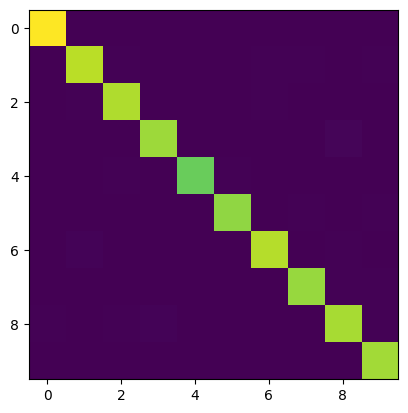

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(test_gnd, y_pred)
cm_2 = ConfusionMatrixDisplay.from_predictions(test_gnd, y_pred_model_2)

cm_train = ConfusionMatrixDisplay.from_estimator(model, test_fea, test_gnd)
cm_train_2 = ConfusionMatrixDisplay.from_estimator(model2, test_fea, test_gnd)


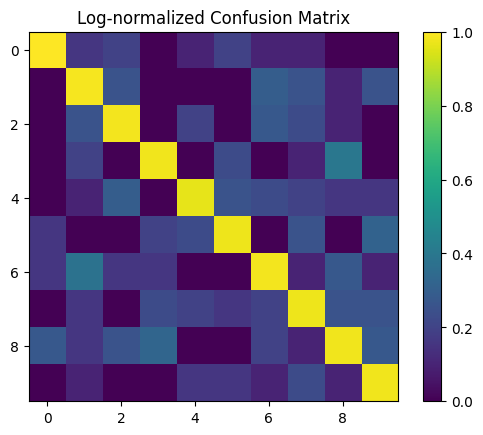

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_gnd, y_pred)

# Log transform — use log(1 + x) to avoid log(0)
cm_log = np.log1p(cm)

# Normalize to [0, 1]
cm_log_norm = cm_log / cm_log.max()

plt.imshow(cm_log_norm)
plt.colorbar()
plt.title("Log-normalized Confusion Matrix")
plt.show()


In [ ]:
def show_confusion_matrix(y_pred):
    cm = confusion_matrix(test_gnd, y_pred)
    cm_log = np.log1p(cm)
    cm_log_norm = cm_log / cm_log.max()
    plt.imshow(cm_log_norm)
    plt.colorbar()
    plt.title("Log-normalized Confusion Matrix")
    plt.show()


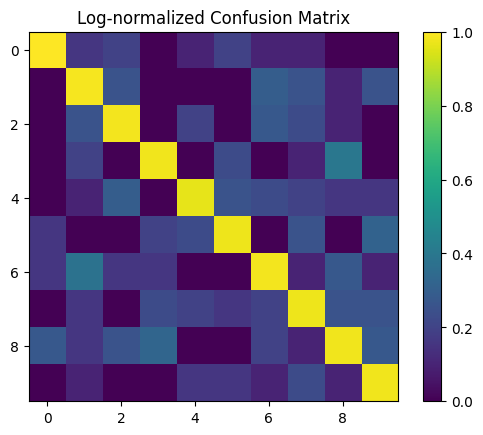

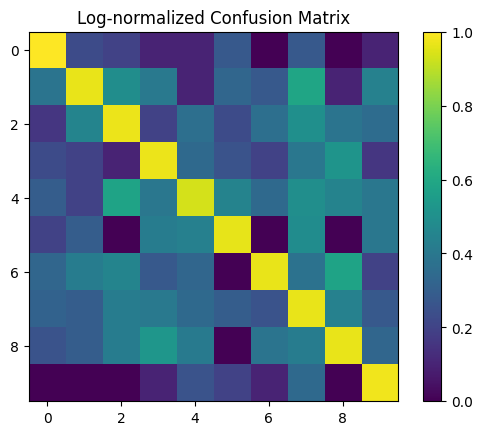

In [ ]:
show_confusion_matrix(y_pred)
show_confusion_matrix(y_pred_model_2)